In [ ]:
import utils
from utils.data import Datasets, TEST_INDICIES, IMAGE_SHAPE, FULL_SEQUENCE_LENGTH

import numpy as np
import matplotlib.pyplot as plt

sequences = Datasets(
    "/Users/henrywilliams/Documents/uni/amml/assessment-2/data"
).n6_full()

In [9]:
def plot_full_sequence(sequence, plot_test: bool = True):
    fig, axs = plt.subplots(2, 8)

    for i in range(len(sequence)):
        if i in TEST_INDICIES and not plot_test:
            axs[i // 8][i % 8].imshow(np.zeros(IMAGE_SHAPE))
        else:
            axs[i // 8][i % 8].imshow(sequence[i])
        axs[i // 8][i % 8].axis("off")
        axs[i // 8][i % 8].title.set_text(f"{i + 1}")


def lerp(
    start: np.ndarray, end: np.ndarray, alpha: float = 0.5, beta: float = 0.5
) -> np.ndarray:
    assert np.isclose(
        alpha + beta, 1.0
    ), "The sum of alpha and beta should be approximately equal to 1"
    return (alpha * start) + (beta * end)

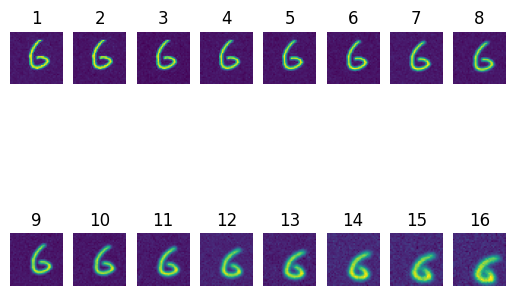

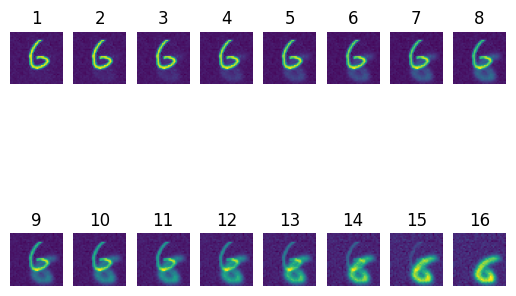

In [10]:
import torch


loss_fn = torch.nn.functional.mse_loss
interp_loss = 0.0

lerped_sequences = np.zeros((400, 16, 36, 36, 1))

for i, sequence in enumerate(sequences):
    start = sequence[0]
    end = sequence[-1]
    lerped_sequence = np.array(
        [
            lerp(
                start,
                end,
                alpha=(FULL_SEQUENCE_LENGTH - k) / FULL_SEQUENCE_LENGTH,
                beta=k / FULL_SEQUENCE_LENGTH,
            )
            for k in range(1, FULL_SEQUENCE_LENGTH + 1)
        ]
    )
    lerped_sequences[i] = lerped_sequence

idx = np.random.randint(0, len(sequences))
y = sequences[idx]
y_hat = lerped_sequences[idx]

plot_full_sequence(y)
plot_full_sequence(y_hat)